# Wrangling data with Python & pandas

In two parts:
* reproducing the DataWrangler process (using the same 'Air crashes' data) and 
* bad, bad data investigations


In [5]:
import pandas as pd # not the bamboo eating bear... 'Panel Data' 

In [6]:
# load data
df = pd.read_csv('AirCrashes.csv') # df is a dataframe, confirm with: type(df)

df.shape

(927, 1)

#### How many lines of data?
#### How many did you get with DataWrangler?

Have a look a the first few rows:

In [12]:
#df[0:2] or
df.head(20)

,split,split1
0,Incident American Airlines Flight 11 involving...,NaN
1,Casualties,Extremely High
2,Total Dead,1692
3,Crew,11
4,Passengers,81
5,Ground,1600
6,Notes,No survivors
7,Type,INH
8,Reason,Attack
9,Location,New York - New York - US


That's not quite right.. the first line has been stolen for the title/header
#### Does read_csv ignore empty lines? 
e.g. line 18 should be blank

skip_blank_lines = True (the default) see:

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Try again, force our own headers upon the data using default column names from DataWrangler (split/extract etc.) 

This pushes the first incident down into the data where it belongs (but adds a NaN, below)

In [13]:
df = pd.read_csv('Air crashes.csv', names = ['split', 'split1']) 
# column names (split, split1) replicate DataWrangler column names
df.head(2)

,split,split1
0,Incident American Airlines Flight 11 involving...,NaN
1,Casualties,Extremely High


In [14]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [15]:
# now extract flights based on one of the suggestions from DataWrangler 

# treat the 'split' column as a str, then 
# use the extract method on the str

### That seems to have worked...

We got 'American Airlines Flight 11' and 'United Airlines Flight 175' etc but lost all the other data and gained a bunch of NaNs

#### What is this 'str.extract' code anyway? (add a comment to decode or explain it)

extract("\Incident(.*)\involving")

### But we want planes in a new column, we can create one called 'extract' like this:

df['extract'] = df['split'].str.extract("\Incident(.*)\involving")

But this would be the last column, we want it in the second (location is not critical but it can be done so why not). 

Try this:

In [16]:
df.insert(1, 'extract', df['split'].str.extract("\Incident(.*)\involving"))
# have a go at commenting this line of code too

In [17]:
df.insert(1, 'extract', df['split'].str.extract("\Incident(.*)\involving"))

ValueError: cannot insert extract, already exists

In [18]:
df.head(20)

,split,extract,split1
0,Incident American Airlines Flight 11 involving...,American Airlines Flight 11,NaN
1,Casualties,NaN,Extremely High
2,Total Dead,NaN,1692
3,Crew,NaN,11
4,Passengers,NaN,81
5,Ground,NaN,1600
6,Notes,NaN,No survivors
7,Type,NaN,INH
8,Reason,NaN,Attack
9,Location,NaN,New York - New York - US


So there's the flight information in it's own column, plus a whole lot of NaNs

We could replace all the NaN with spaces or similar but they can wait

Now we want the aircraft in it's own column, similar to above, 
based on the suggestion from DataWrangler, note spaces in "\ a (.*)\ in "

#### but is this optimal?  

In [19]:
# and repeat to get the aircraft type 
df.insert(1, 'extract1', df['split'].str.extract("\ a (.*)\ in "))
# and df.head(20) to confirm

## Now we want to 'fill down'

(e.g. lines 1 to 15 should be associated with line 0)

there are several options
* na.locf() method from zoo package. 
* ddply() from plyr
* bfill()
* fillna()


In [20]:
df = df.fillna(method = 'pad') # magic, take the previous value (not NaN) and fill down

# http://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna

In [21]:
df.head(20)

,split,extract1,extract,split1
0,Incident American Airlines Flight 11 involving...,Boeing 767-223ER,American Airlines Flight 11,NaN
1,Casualties,Boeing 767-223ER,American Airlines Flight 11,Extremely High
2,Total Dead,Boeing 767-223ER,American Airlines Flight 11,1692
3,Crew,Boeing 767-223ER,American Airlines Flight 11,11
4,Passengers,Boeing 767-223ER,American Airlines Flight 11,81
5,Ground,Boeing 767-223ER,American Airlines Flight 11,1600
6,Notes,Boeing 767-223ER,American Airlines Flight 11,No survivors
7,Type,Boeing 767-223ER,American Airlines Flight 11,INH
8,Reason,Boeing 767-223ER,American Airlines Flight 11,Attack
9,Location,Boeing 767-223ER,American Airlines Flight 11,New York - New York - US


In [22]:
# now delete all the 'incident' rows, they have served their purpose and are now redundant
df = df[df['split'].str.contains("Incident") == False] # keep everything that doesn't have "Incident" in it 
# do we need to worry about a plane called "Incident" or "Incident weather" etc???

In [23]:
df.shape

(870, 4)

In [24]:
# and check with e.g. df.shape 
df.head(20)

,split,extract1,extract,split1
1,Casualties,Boeing 767-223ER,American Airlines Flight 11,Extremely High
2,Total Dead,Boeing 767-223ER,American Airlines Flight 11,1692
3,Crew,Boeing 767-223ER,American Airlines Flight 11,11
4,Passengers,Boeing 767-223ER,American Airlines Flight 11,81
5,Ground,Boeing 767-223ER,American Airlines Flight 11,1600
6,Notes,Boeing 767-223ER,American Airlines Flight 11,No survivors
7,Type,Boeing 767-223ER,American Airlines Flight 11,INH
8,Reason,Boeing 767-223ER,American Airlines Flight 11,Attack
9,Location,Boeing 767-223ER,American Airlines Flight 11,New York - New York - US
10,Country,Boeing 767-223ER,American Airlines Flight 11,US


### Now to 'unfold', there are several options

* melt()
* stack, unstack?
* pivot_table()
* pivot()

http://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [25]:
data = df.pivot('extract', 'split', 'split1') 
# the parameters above are (left to right) index, columns, values 
# You can also write it like this:
# data = df.pivot(index = 'extract', columns = 'split', values = 'split1') 

In [26]:
data.shape 

(58, 15)

In [27]:
data.head() # 58 records, good, but lost plane type, bad
# where's 'extract1' - can we have multiple indexes or have to put that data back in?

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,
Aeroflot Flight 217,Extremely High,Bad Visibility by Day,Russia,10,1972-10-13,0,55.755826,Moscow - Russia,37.6173,No survivors,164,APR,Accident,174,COM
Aeroflot Flight 3352,Extremely High,Bad Visibility by Night,Russia,5,1984-10-11,4,54.9666667,Omsk - Russia,73.3833333,Some survivors,169,LDG,Accident,178,COM
Aeroflot Flight 4227,Extremely High,Bad Visibility by Night,Kazakhstan,10,1890-07-08,0,43.255058,Almaty - Kazakhstan,76.912628,No survivors,156,ENR,Accident,166,COM
Aeroflot Flight 7425,Extremely High,Bad Visibility by Night,Uzbekistan,9,1985-07-10,0,42.1566667,Uchkuduk - Uzbekistan,63.5555556,No survivors,191,ENR,Accident,0,COM
Aeroflot/Moldovia (CCCP-65816),Extremely High,Bad Visibility by Night,Kazakhstan,13,1979-08-11,0,48.8125,Saykyn - Kazakhstan,46.7636111,No survivors,165,ENR,Accident,178,COM


### Problem:

we have two columns we want to pivot on, 'extract' & 'extract1' (AKA flight & plane) but

pivot() can't have multiple indexes...

e.g. df.pivot(index = ['extract','extract1'], 'split', 'split1') # error

pivot_table() can but insists on doing some accounting or aggreagating too, like sum or avg, which we don't need

e.g. pd.pivot_table(df, values='split1', index = ['extract','extract1'], columns='split') # error, no function 

### Solutions? 

use pivot() then force the other column back into the data?? 

or trick pivot_table() into doing some pointless accounting (that adds up to nothing)??

try something else... stack, unstack, group, dplyr?

DIY code??

In [2]:
# solution: make the function a copy, x = x
data = pd.pivot_table(df, index=["extract","extract1"], columns = 'split', values = 'split1', aggfunc = lambda x: x) # ha, cop that

# http://stackoverflow.com/questions/19279229/pandas-pivot-table-with-non-numeric-values-dataerror-no-numeric-types-to-ag

data # not using df anymore, keep it as backup

NameError: name 'pd' is not defined

### That's most of the wrangling as was done with DataWrangler, there are a few more optional steps:
* want the manufacturer e.g. Beoing?
* remove 'extract' & 'extract1'?
* rename columns ('split') 
* extract year into new column 
* export e.g. df.to_csv(file_name, sep=',')

# But wait there's more:
Part B: bad, bad data

This data has been deliberately damaged (sorry)

Some are obvious, some are subtle (some were already there... e.g. look for 'Â')

### See if you can find them

In [28]:
# start with a summary table
data.describe()

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
count,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
unique,1,3,36,20,56,14,57,57,57,3,50,5,2,51,7
top,Extremely High,Bad Visibility by Night,US,14,2001-09-11,0,40.7143528,New York - New York - US,-74.0059731,No survivors,156,ENR,Accident,189,COM
freq,58,49,7,7,3,45,2,2,2,46,3,38,50,2,48


### describe() shows:

* count - we can see that there are 58 records across the board, no surprise (what would it mean if there were non 58s?)
* unique - looks like all the 'Casualties' are identical (unique = 1, i.e. all 'Extremely High'), maybe this column is redundant?
* top - interesting, there were two major disasters in the exact same place? Check dates?
* freq - also interesting, 3 times there were 156 passengers on flights... superstitious? Or is it bad data?

So some clues here, dig deeper:

In [29]:
#We can also describe individual columns:
data['Crew'].describe()

count     58
unique    20
top       14
freq       7
Name: Crew, dtype: object

In [30]:
# nothing new here, the most common number crew size is 14 (7 times)
# what's the biggest crew?
data['Crew'].max()

'9'

### ¿que?
Why 9 (or even '9')?

How can this max be less than 14?

Are these even numbers?


In [31]:
data['Crew'].mean() # expecting ~15, they were all big planes?

1.8122263814176414e+95

This is weird

If they are numbers it should be higher

If they are not numbers, what does mean 'mean'? 

In [32]:
data[data['Crew'] == 14] # look at all the crew = 14 planes, should be 7

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,


In [33]:
# there are none... try this:
data[data['Crew'] == '14'] 

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,
British Airways Flight 476 and,Extremely High,Bad Visibility by Night,Croatia,14,1976-09-10,1,45.8839523,Vrbovec - Croatia,16.416766,No survivors,162,ENR,Accident,177,COM
China Airlines Flight 676,Extremely High,Bad Visibility by Night,China,14,1998-02-16,7,25.0492632,Dayuan - Taiwan - China,121.193945,No survivors,182,APR,Accident,202,COM
China Northwest Airlines Flight 2303,Extremely High,Bad Visibility by Night,China,14,1984-06-06,0,34.341568,Xian - China,108.940175,No survivors,146,ENR,Accident,150,COM
Nigeria Airways Flight 2120,Extremely High,Bad Visibility by Night,Saudi Arabia,14,1991-07-11,0,21.5433333,Jeddah - Saudi Arabia,39.1727778,No survivors,247,APR,Accident,261,COM
Saudia Flight 163,Extremely High,Bad Visibility by Night,Saudi Arabia,14,1980-08-19,0,24.7116667,Riyadh - Saudi Arabia,46.7241667,No survivors,287,ENR,Accident,301,COM
Swissair Flight 111,Extremely High,Bad Visibility by Day,Canada,14,1998-09-02,0,44.4927778,Atlantic Ocean - Peggys Cove - N.S. - Canada,-63.9175,No survivors,215,ENR,Accident,229,COM
Union de Transportes Aériens Flight 772,Extremely High,Bad Visibility by Night,Niger,14,1989-19-09,0,18.9546137,Tenere - Niger,10.9134609,No survivors,156,ENR,Attack,170,INB


In [34]:
# so there's a clue, 14 vs '14' 
# what are these data types anyway?
data.dtypes

split
Casualties       object
Circumstances    object
Country          object
Crew             object
Date             object
Ground           object
Latitude         object
Location         object
Longitude        object
Notes            object
Passengers       object
Phase            object
Reason           object
Total Dead       object
Type             object
dtype: object

### All data are of type object... 
### Overruled:

In [35]:
data = data.convert_objects(convert_numeric = True) 
# this is a bit brutal, can you convert when data is loaded?

In [50]:
data.dtypes

split
Casualties        object
Circumstances     object
Country           object
Crew               int64
Date              object
Ground             int64
Latitude         float64
Location          object
Longitude        float64
Notes             object
Passengers         int64
Phase             object
Reason            object
Total Dead         int64
Type              object
dtype: object

In [51]:
# so now we have some numbers (int & float)
data.describe()

split,Crew,Ground,Latitude,Longitude,Passengers,Total Dead
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,15.396552,51.017241,25.337876,21.807698,200.724138,257.155172
std,22.838825,240.369561,28.037558,74.024614,87.867283,232.558071
min,0.000000,0.000000,-100.423369,-100.423369,0.000000,0.000000
25%,9.000000,0.000000,13.835361,-52.617466,159.000000,171.750000
50%,12.000000,0.000000,30.489219,15.865327,181.000000,195.000000
75%,15.000000,0.000000,41.964744,76.751146,241.500000,263.250000
max,181.000000,1600.000000,55.755826,167.075701,560.000000,1692.000000


### Better, more information, describe() now shows:
* count - as above, all 58
* mean - crew ~15, seems OK, but mean lat & long doesn't mean much... or does it?
* std - Standard Deviation
* min - now we see some problems, zero crew? Was this a way to code a hijacking, or is it missing, or should it be 10, 20, 30?
* 25, 50 & 75% are quartiles...
* max - crew 181, no way! 1692 dead, no plane is that big... or could this be Lockerbie, i.e. plane hit town

Let's investigate the crew data:

In [36]:
data[data['Crew'] > 20] # try also e.g. < 10

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,
Air India Flight 182,Extremely High,Bad Visibility by Night,Ireland,22,1985-06-23,0,51.896892,Atlantic Ocean - Cork - Ireland,-8.486316,No survivors,307,ENR,Attack,329,INB
Air India Flight 855,Extremely High,Bad Visibility by Night,India,23,1978-01-01,0,19.075984,Arabian Sea - Mumbai - India,72.877656,No survivors,190,ENR,Accident,213,COM
Avianca Flight 011,Extremely High,Bad Visibility by Night,Spain,181,1983-11-27,0,40.416775,Madrid - Spain,-3.703790,Some survivors,162,APR,Accident,181,COM
Korean Air Flight 801,Extremely High,Bad Visibility by Night,US,22,1997-08-06,0,13.466681,Asan - Guam - US,144.745469,Some survivors,206,APR,Accident,228,COM
Korean Air Lines Flight 007,Extremely High,Bad Visibility by Night,Russia,23,1983-09-01,0,46.250000,Sea of Japan - Moneron Island - Russia,141.233333,No survivors,246,ENR,Attack,269,EXS
Pan Am Flight 1736 and KLM Flight 4805,Extremely High,Bad Visibility by Day,Spain,23,1977-03-27,0,28.291564,Tenerife - Spain,-16.629130,Some survivors,560,TOF,Accident,583,COM
Saudi Arabian Flight 763 and,Extremely High,Bad Visibility by Night,India,33,1996-11-12,0,28.600000,Charkhi Dadri - India,76.266700,No survivors,316,ENR,Accident,349,


So Boeing 747s have large crews...
#### 33 crew is that possible? Or is that two flights?

#### 181 crew? Same value as for 'Total dead', can you derive crew from dead minus passengers?
(or does 'Some survivors' corrupt the maths?)


# Another way to explore... plot that data:


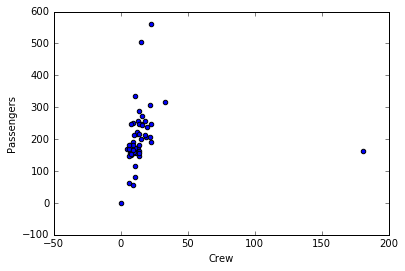

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# big plane = more passengers = more crew? 
plt.scatter(data['Crew'], data['Passengers'])
plt.xlabel('Crew')
plt.ylabel('Passengers')

#### And there's the extreme outlier
#### Are there any others?

In [38]:
# so how to put a number to an outlier?
data['Crew'].max() # works, now that they are numbers

181

In [39]:
# so, how to find the record?
idx = (data[data['Crew'] == data['Crew'].max()].index)

# idx = (data[data['Crew'] == data['Crew'].max()].index.tolist()) # use a list in case there's more than one

data.loc[idx]

# remember that our index is 'extract' & 'extract1', maybe that's another future fix, numeric indexing
# consider also the possibility that flight numbers get reused and the same flight could meet with disaster (superstitious?)

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,
Avianca Flight 011,Extremely High,Bad Visibility by Night,Spain,181,1983-11-27,0,40.416775,Madrid - Spain,-3.70379,Some survivors,162,APR,Accident,181,COM


## Plotting non-numeric data

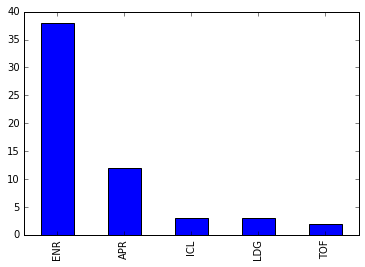

In [40]:
fig, ax = plt.subplots()
data['Phase'].value_counts().plot(ax=ax, kind='bar')
# you can guess some of these codes
# ENR = en route?
# APR = Aproach
# Takeoff, Landing
# ICL?

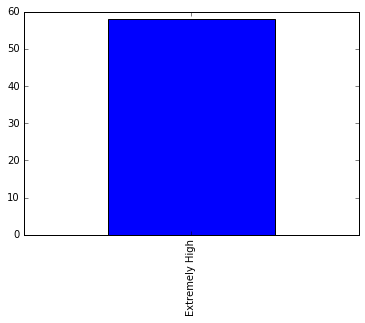

In [41]:
# not much point in plotting Casualties... so what the hey
fig, ax = plt.subplots()
data['Casualties'].value_counts().plot(ax=ax, kind='bar')

# To do: find any other data problems (there are about 10)

#### Post your suspected bad data cases in Moodle discussion forums, how you found it, and suggested fixes
(one or two each, share the load)


In [57]:
# go crazy

#### Can data be 'typed' as it is read in? 
(yes see 'dtype')
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#### What happens if this process encounters bad data?

#### So why is 'Crew' max '9' above?

#### When a plane hits another plane is that one record or two?

#### Can DataWrangler do this sort of wrangling? 

